In [1]:
import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import community
import pandas as pd


import chart_studio.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")


import metaknowledge as mk
RC = mk.RecordCollection(r'D:\python科学计量可视化\数据\Demo data\Python-Wos', cached = True)
RC2021 = RC.yearSplit(2020,2021)
df = pd.DataFrame(RC2021.makeDict())
print(len(df))
df.head()

783


,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,CT,CY,CL,HC,HP,SI,num-Authors,num-Male,num-Female,num-Unknown
0,J,"[Viglioni, MTD, de Brito, MJ, Calegario, CLL]","[Dinali Viglioni, Marco Tulio, de Brito, Mozar...",Innovation and R&D in Latin America and the Ca...,SCIENTOMETRICS,English,Article,[integration review of pre-existing approaches...,"[NON-TECHNOLOGICAL INNOVATIONS, TOTAL FACTOR P...",After the groundbreaking works of Joseph Schum...,...,None,None,None,None,None,None,3,1,1,1
1,J,"[Bornmann, L, Marx, W]","[Bornmann, Lutz, Marx, Werner]",Thomas theorem in research evaluation,SCIENTOMETRICS,English,Letter,"[bibliometrics, thomas theorem]",[UNIVERSITY RANKINGS],"The well-known ""Thomas theorem"" in sociology i...",...,None,None,None,None,None,None,2,2,0,0
2,J,"[Hassan, SU, Aljohani, NR, Shabbir, M, Ali, U,...","[Hassan, Saeed-Ul, Aljohani, Naif R., Shabbir,...",Tweet Coupling: a social media methodology for...,SCIENTOMETRICS,English,Article,"[scientific document clustering, social media,...","[RESEARCH IMPACT, ARTICLE-LEVEL, ALTMETRICS, C...",We argue that classic citation-based scientifi...,...,None,None,None,None,None,None,9,6,1,2
3,J,"[Dell'Anno, R, Caferra, R, Morone, A]","[Dell'Anno, Roberto, Caferra, Rocco, Morone, A...","A ""Trojan Horse"" in the peer-review process of...",JOURNAL OF INFORMETRICS,English,Article,"[predatory journal, publication fees, article ...","[SCIENCE, IMPACT]",This paper aims to unmask the inadequacy of th...,...,None,None,None,None,None,None,3,2,1,0
4,J,"[George, S, Lathabai, HH, Prabhakaran, T, Chan...","[George, Susan, Lathabai, Hiran H., Prabhakara...",A framework towards bias-free contextual produ...,SCIENTOMETRICS,English,Article,"[bias-free productivity assessment, contextual...","[MULTI-AUTHORED PAPERS, H-INDEX, CREDIT, NETWO...",Productivity assessment of various actors is o...,...,None,None,None,None,None,None,4,2,2,0


# 以关键词为例

In [2]:
keywords = RC2021.networkOneMode('keywords')
print(mk.graphStats(keywords))

Nodes: 1347
Edges: 9882
Isolates: 25
Self loops: 0
Density: 0.0109009
Transitivity: 0.179112


In [3]:
mk.dropEdges(keywords, minWeight = 6, dropSelfLoops = True) 
mk.dropNodesByDegree(keywords, minDegree = 1, useWeight = False)

keywordsGiant = max((keywords.subgraph(c) for c in nx.connected_components(keywords)), key=len)
print(mk.graphStats(keywordsGiant))

Nodes: 31
Edges: 51
Isolates: 0
Self loops: 0
Density: 0.109677
Transitivity: 0.155556


按照节点特征向量中心度进行节点大小设置,也可以使用其他的中心度指标进行

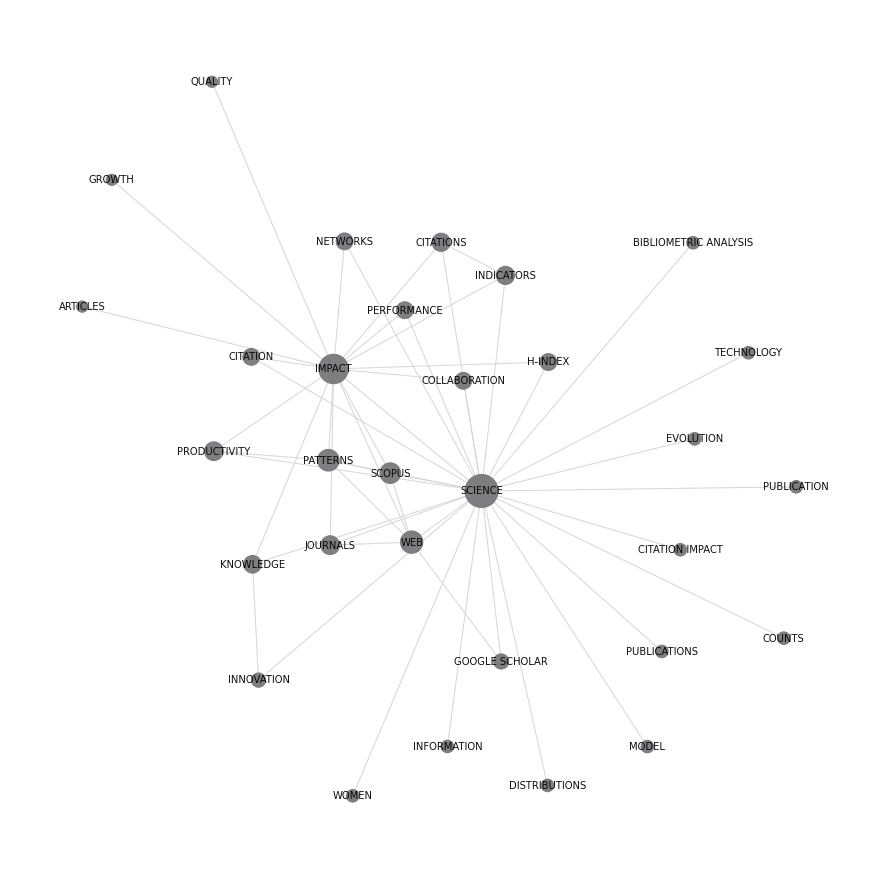

In [4]:
eig = nx.eigenvector_centrality(keywordsGiant)
size = [2000 * eig[node] for node in keywordsGiant]

plt.figure(figsize=(12,12))
nx.draw_spring(keywordsGiant, with_labels = True, node_size = size, font_size = 10,
               node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/one_mode_keywards_simple.png',dpi=300,bbox='tight')

想把显示的标签用首字母大写代替

In [5]:
s = 'SOCIAL-SCINECES'
s.capitalize()

'Social-scineces'

In [6]:
print({k:k.capitalize() for k,v in keywordsGiant.nodes.data()})

{'PERFORMANCE': 'Performance', 'GROWTH': 'Growth', 'SCIENCE': 'Science', 'IMPACT': 'Impact', 'H-INDEX': 'H-index', 'PUBLICATIONS': 'Publications', 'CITATIONS': 'Citations', 'EVOLUTION': 'Evolution', 'KNOWLEDGE': 'Knowledge', 'GOOGLE SCHOLAR': 'Google scholar', 'WEB': 'Web', 'JOURNALS': 'Journals', 'PUBLICATION': 'Publication', 'INFORMATION': 'Information', 'NETWORKS': 'Networks', 'PRODUCTIVITY': 'Productivity', 'INNOVATION': 'Innovation', 'COLLABORATION': 'Collaboration', 'PATTERNS': 'Patterns', 'DISTRIBUTIONS': 'Distributions', 'INDICATORS': 'Indicators', 'BIBLIOMETRIC ANALYSIS': 'Bibliometric analysis', 'QUALITY': 'Quality', 'CITATION': 'Citation', 'COUNTS': 'Counts', 'MODEL': 'Model', 'SCOPUS': 'Scopus', 'CITATION IMPACT': 'Citation impact', 'ARTICLES': 'Articles', 'TECHNOLOGY': 'Technology', 'WOMEN': 'Women'}


In [7]:
keywordsGiant = nx.relabel_nodes(keywordsGiant,mapping={k:k.capitalize() for k,v in keywordsGiant.nodes.data()})

In [8]:
keywordsGiant.nodes.data()

NodeDataView({'Performance': {'count': 37}, 'Growth': {'count': 14}, 'Science': {'count': 149}, 'Impact': {'count': 121}, 'H-index': {'count': 26}, 'Publications': {'count': 20}, 'Citations': {'count': 32}, 'Evolution': {'count': 25}, 'Knowledge': {'count': 26}, 'Google scholar': {'count': 15}, 'Web': {'count': 42}, 'Journals': {'count': 33}, 'Publication': {'count': 14}, 'Information': {'count': 37}, 'Networks': {'count': 32}, 'Productivity': {'count': 30}, 'Innovation': {'count': 28}, 'Collaboration': {'count': 34}, 'Patterns': {'count': 44}, 'Distributions': {'count': 14}, 'Indicators': {'count': 26}, 'Bibliometric analysis': {'count': 24}, 'Quality': {'count': 16}, 'Citation': {'count': 31}, 'Counts': {'count': 13}, 'Model': {'count': 28}, 'Scopus': {'count': 25}, 'Citation impact': {'count': 20}, 'Articles': {'count': 30}, 'Technology': {'count': 22}, 'Women': {'count': 12}})

继续可视化网络图，按照节点的count计数和连线的weight属性进行节点大小和连线粗细的设置

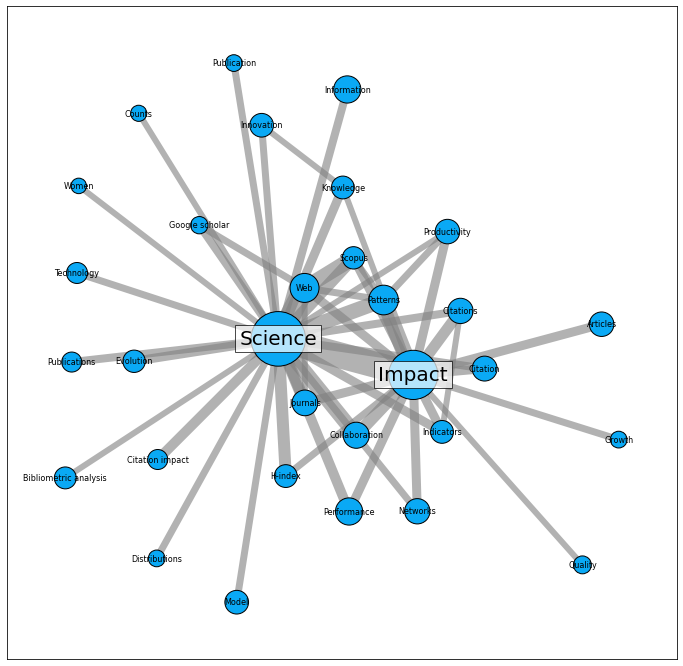

In [9]:
edge_width = [v[-1]['weight'] for v in keywordsGiant.edges.data()]
node_size = [v['count']*20 for k,v in keywordsGiant.nodes.data()]

plt.figure(figsize=(12,12))
pos = nx.spring_layout(keywordsGiant,seed=24)

nx.draw_networkx_edges(keywordsGiant,pos,width=edge_width,edge_color='gray',alpha=0.6)
nx.draw_networkx_nodes(keywordsGiant,pos,node_size=node_size,node_color='#0AA9F5',edgecolors='k')

G_sub = keywordsGiant.subgraph([k for k,v in keywordsGiant.nodes.data() if v['count']>=50])
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_sub,pos,font_size=20,bbox=label_options,)

G_sub_1 = keywordsGiant.subgraph([k for k,v in keywordsGiant.nodes.data() if v['count']<50])
nx.draw_networkx_labels(G_sub_1,pos,font_size=8)

plt.savefig('figures/one_mode_keywards.png',dpi=300,bbox='tight')

## 如何确定tag标签

In [10]:
print(RC.tags())

{'CT', 'UT', 'PY', 'GA', 'EM', 'WC', 'SC', 'RP', 'AU', 'DA', 'SI', 'PA', 'NR', 'HP', 'ID', 'PT', 'RI', 'SO', 'EP', 'IS', 'EA', 'HO', 'PD', 'CL', 'AB', 'PI', 'TC', 'CR', 'DT', 'U2', 'FU', 'AF', 'PG', 'OA', 'DE', 'VL', 'PU', 'HC', 'SN', 'C1', 'OI', 'BP', 'PM', 'J9', 'FX', 'CY', 'Z9', 'DI', 'EI', 'TI', 'AR', 'U1', 'LA', 'JI', 'SP'}


In [11]:
R = RC.peek()

for i in RC.tags():
    print(i,R.getAltName(i))

CT confTitle
UT wosString
PY year
GA documentDeliveryNumber
EM email
WC subjects
SC subjectCategory
RP reprintAddress
AU authorsShort
DA None
SI specialIssue
PA publisherAddress
NR citedRefsCount
HP None
ID keywords
PT pubType
RI ResearcherIDnumber
SO journal
EP endingPage
IS issue
EA None
HO confHost
PD month
CL confLocation
AB abstract
PI publisherCity
TC wosTimesCited
CR citations
DT docType
U2 None
FU funding
AF authorsFull
PG pageCount
OA None
DE authKeywords
VL volume
PU publisher
HC None
SN ISSN
C1 authAddress
OI orcID
BP beginningPage
PM pubMedID
J9 j9
FX fundingText
CY confDate
Z9 totalTimesCited
DI DOI
EI eISSN
TI title
AR articleNumber
U1 None
LA language
JI isoAbbreviation
SP confSponsors


In [12]:
for i,j in zip(df.columns, df.iloc[0]):
    print(i,R.getAltName(i),j)

PT pubType J
AU authorsShort ['Viglioni, MTD', 'de Brito, MJ', 'Calegario, CLL']
AF authorsFull ['Dinali Viglioni, Marco Tulio', 'de Brito, Mozar Jose', 'Leal Calegario, Cristina Lelis']
TI title Innovation and R&D in Latin America and the Caribbean countries: a systematic literature review
SO journal SCIENTOMETRICS
LA language English
DT docType Article
DE authKeywords ['integration review of pre-existing approaches', 'innovation and r&d', 'latin america and caribbean countries', 'south america']
ID keywords ['NON-TECHNOLOGICAL INNOVATIONS', 'TOTAL FACTOR PRODUCTIVITY', 'PUBLIC SUPPORT', 'MANUFACTURING FIRMS', 'STRUCTURAL REFORMS', 'EMERGING ECONOMIES', 'PERFORMANCE', 'GROWTH', 'EMPLOYMENT', 'BUSINESS']
AB abstract After the groundbreaking works of Joseph Schumpeter, a burgeoning literature related to innovations emerged. As works in this tradition have progressed, the innovation literature has recognized that the keystone to stimulate innovation across all economies relies on Researc

## 进行发文地址的一模网络探究

作者的发文地址在C1字段中，通信作者的地址信息在RP字段中

In [13]:
cl_network = RC2021.networkOneMode('C1')
print(mk.graphStats(cl_network))

Nodes: 1602
Edges: 2069
Isolates: 215
Self loops: 0
Density: 0.00161338
Transitivity: 0.837446


看一下子群节点数量

In [14]:
print(sorted([len(k) for k in nx.connected_components(cl_network)],reverse=True))

[78, 56, 19, 16, 14, 14, 11, 11, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

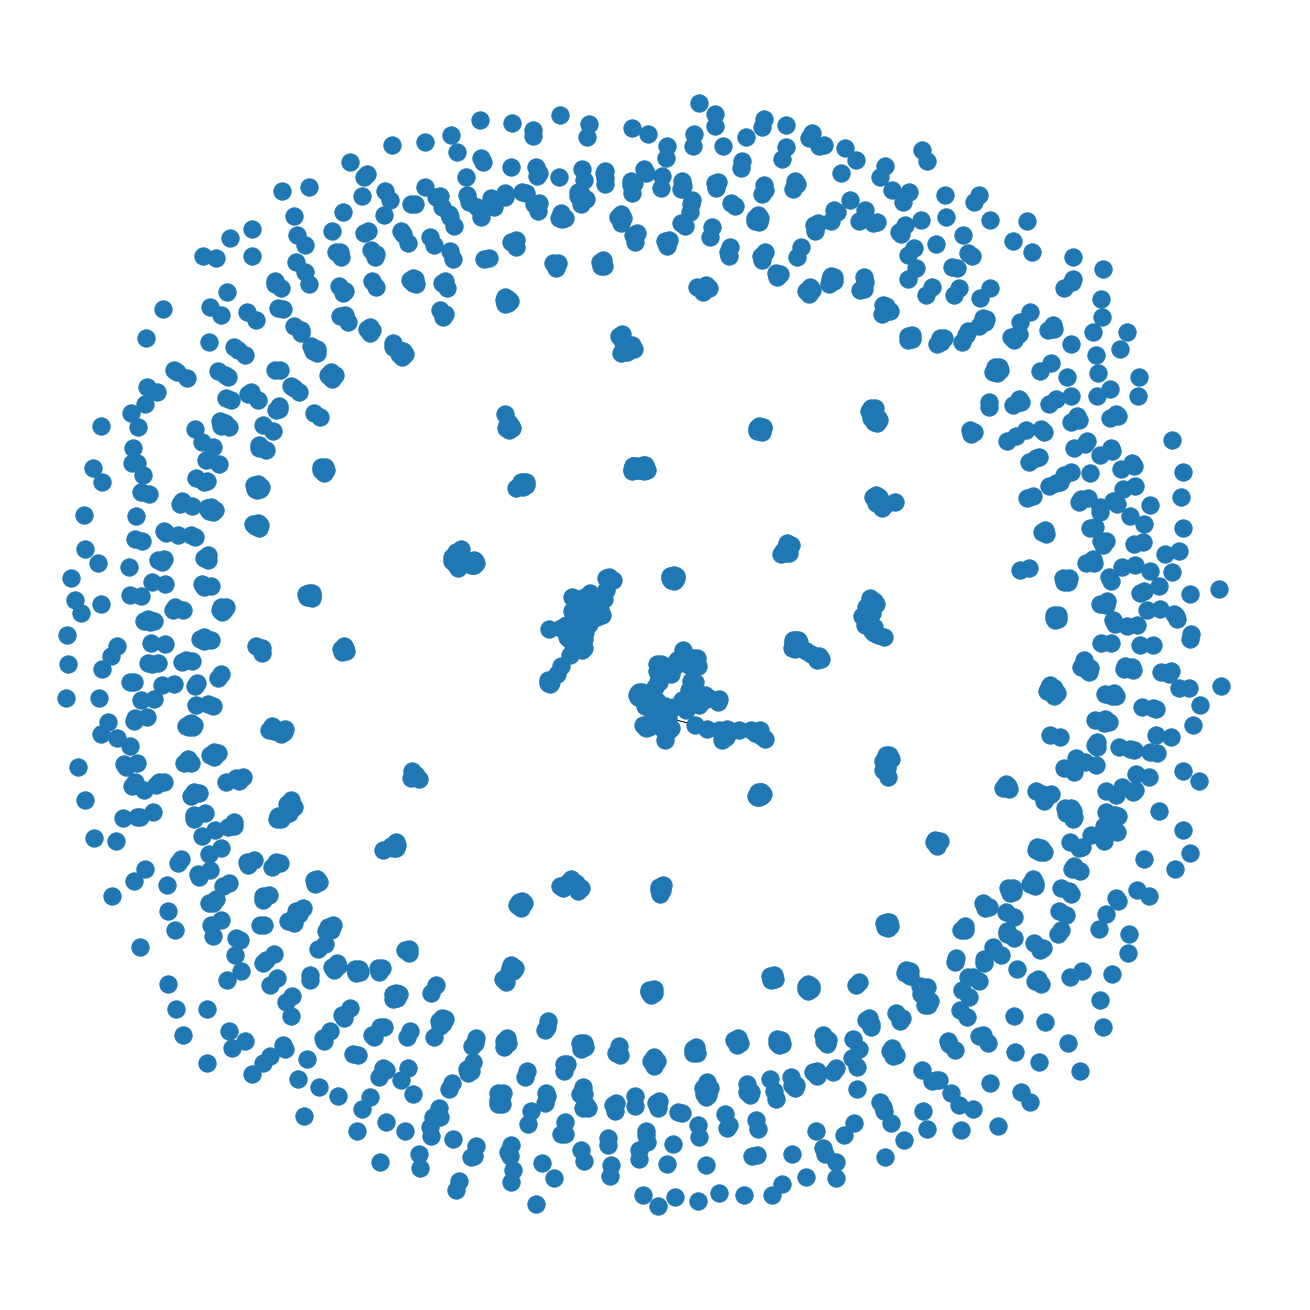

In [15]:
plt.figure(figsize=(18,18))
nx.draw_spring(cl_network)

网络图中的主要信息并不是在最大的几个子群上,造成这种现象的原因在于只选用了两年的数据集，累积效应没有显现出来，可以尝试扩大一下数据

In [16]:
RC1021 = RC.yearSplit(2010,2021)
cl_network = RC1021.networkOneMode('C1')
print(mk.graphStats(cl_network))

Nodes: 9144
Edges: 11465
Isolates: 1352
Self loops: 8
Density: 0.000274271
Transitivity: 0.467414


此时就可以发现，最大子群中包含了节点的数量原超其他节点，且随着数据量增加，这个子群中的节点的数量会越来越多

In [17]:
print(sorted([len(k) for k in nx.connected_components(cl_network)],reverse=True)[:100])

[1881, 40, 32, 26, 21, 21, 21, 20, 20, 18, 16, 15, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [18]:
giant_cl = max((cl_network.subgraph(c) for c in nx.connected_components(cl_network)), key=len)
print(mk.graphStats(giant_cl))

Nodes: 1881
Edges: 4452
Isolates: 0
Self loops: 4
Density: 0.0025179
Transitivity: 0.316567


查看是否网络围绕着某一中心节点分布,最大的节点的度只有节点数量的3%，故网络也并不是围绕着某一节点，有兴趣也可以使用ego_graph提取指定机构的关联网络

In [19]:
sorted([(k,v) for k,v in giant_cl.degree()],key=lambda x:x[1],reverse=True)[:15]

[('Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.', 65),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 CX Amsterdam, Netherlands.',
  56),
 ('Univ Antwerp, IBW, B-2000 Antwerp, Belgium.', 55),
 ('Georgia Inst Technol, Sch Publ Policy, Atlanta, GA 30332 USA.', 49),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.',
  47),
 ('Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.',
  43),
 ('Indiana Univ, Sch Informat & Comp, Bloomington, IN 47405 USA.', 38),
 ('Tsinghua Univ, Dept Comp Sci & Technol, Beijing 100084, Peoples R China.',
  37),
 ('Univ Montreal, Ecole Bibliothecon & Sci Informat, Montreal, PQ, Canada.',
  35),
 ('Katholieke Univ Leuven, Dept MSI, Louvain, Belgium.', 35),
 ('KHBO Assoc KU Leuven, Fac Engn Technol, B-8400 Oostende, Belgium.', 35),
 ('Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.', 33),
 ('Univ Michigan, Sch Informat, Ann Arbor, MI 48109

In [20]:
sorted([(k,v) for k,v in giant_cl.nodes.data()],key=lambda x:x[1]['count'],reverse=True)[:15]

[('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 CX Amsterdam, Netherlands.',
  {'count': 52}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.',
  {'count': 42}),
 ('Indiana Univ, Sch Lib & Informat Sci, Bloomington, IN 47405 USA.',
  {'count': 41}),
 ('Drexel Univ, Coll Comp & Informat, Philadelphia, PA 19104 USA.',
  {'count': 39}),
 ('Univ Antwerp, IBW, B-2000 Antwerp, Belgium.', {'count': 36}),
 ('Max Planck Gesell, Adm Headquarters, Div Sci & Innovat Studies, Hofgartenstr 8, D-80539 Munich, Germany.',
  {'count': 34}),
 ('Natl Taiwan Univ, Dept Lib & Informat Sci, Taipei 10617, Taiwan.',
  {'count': 34}),
 ('Max Planck Inst Solid State Res, Heisenbergstr 1, D-70569 Stuttgart, Germany.',
  {'count': 32}),
 ('Georgia Inst Technol, Sch Publ Policy, Atlanta, GA 30332 USA.',
  {'count': 30}),
 ('Lib Hungarian Acad Sci, Dept Sci Policy & Scientometr, Budapest, Hungary.',
  {'count': 27}),
 ('Wuhan Univ, Sch Informat Management,

## 如何对网络中的数据进行清洗

（1）一种方法就是修改原文件数据，需要手动每份文件中进行替换内容的查找更替（当文件数量较多时候不推荐）

（2）另一种就是生成网络数据集后，再对数据集中进行数据清洗（以下案例介绍的方式）

从上面输出的结果中，可以发现

比如武汉大学信息管理学院存在着格式不一致的现象（下文中就依此进行举例）

    * 第一个形式为（少了邮编）： Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.
    * 第二个形式为：Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.
    * 第三个形式为（少了具体城市）：Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.
    * 第四种形式为（少了具体城市和邮编）：Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.

由于网络图中的数据集，是类似字典的数据类型，如果键相同就会自动进行覆盖，所以在进行节点重命名之前，需要先获取节点和连线对应的计数值

In [21]:
G = nx.Graph([('Science','Nature',{'weight':20}),('science','Nature',{'weight':10})])
G.edges.data()

EdgeDataView([('Science', 'Nature', {'weight': 20}), ('Nature', 'science', {'weight': 10})])

In [22]:
G = nx.Graph([('Science','Nature',{'weight':20}),('Science','Nature',{'weight':10})])
G.edges.data()

EdgeDataView([('Science', 'Nature', {'weight': 10})])

## 清洗的流程

    先处理连线再处理节点
    还是先处理节点再处理连线

In [23]:
G = nx.Graph([('Science','Nature',{'weight':20}),('science','Nature',{'weight':10})])
G.edges.data()

EdgeDataView([('Science', 'Nature', {'weight': 20}), ('Nature', 'science', {'weight': 10})])

In [24]:
G.nodes['Science']['count'] = 3
G.nodes['science']['count'] = 5
G.nodes['Nature']['count'] = 8

In [25]:
G.nodes.data()

NodeDataView({'Science': {'count': 3}, 'Nature': {'count': 8}, 'science': {'count': 5}})

In [26]:
G = nx.relabel_nodes(G,{'science':'Science'})
G.edges[('Science', 'Nature')]['weight'] = 10+20
G.edges.data()

EdgeDataView([('Science', 'Nature', {'weight': 30})])

In [27]:
G = nx.relabel_nodes(G,{'science':'Science'})
G.nodes['Science']['count'] = 3+5
G.nodes.data()

NodeDataView({'Science': {'count': 8}, 'Nature': {'count': 8}})

先清洗连线，在清洗节点，没有问题，如果顺序反过来呢

In [28]:
G = nx.Graph([('Science','Nature',{'weight':20}),('science','Nature',{'weight':10})])
G.nodes['Science']['count'] = 3
G.nodes['science']['count'] = 5
G.nodes['Nature']['count'] = 8

G = nx.relabel_nodes(G,{'science':'Science'})
G.nodes['Science']['count'] = 3+5
G.nodes.data()

NodeDataView({'Science': {'count': 8}, 'Nature': {'count': 8}})

由于是无向的网络图，所以对于连线中的节点的前后顺序没有要求

In [29]:
G.edges[('Science', 'Nature')]['weight'] = 10+20

In [30]:
G.edges.data()

EdgeDataView([('Science', 'Nature', {'weight': 30})])

In [31]:
G.edges[('Nature','Science' )]['weight'] = 0

In [32]:
G.edges.data()

EdgeDataView([('Science', 'Nature', {'weight': 0})])

输出结果显示修改节点和连线的顺序不会对结果造成影响

## 以武汉大学信息管理学院数据清洗为例

#### (1)首先需要创建映射，即把要替换的内容和正确的内容构建成为一一对应的关系

In [33]:
obtain_str = 'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.'

replace_ls = [
    'Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.',
    'Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.',
    'Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.'
]

all_ls = [
    'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.',
    'Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.',
    'Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.',
    'Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.'
]

dict(zip(replace_ls,[obtain_str]*len(replace_ls)))

{'Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.': 'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.',
 'Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.': 'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.',
 'Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.': 'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.'}

虽然清洗节点还是连线的在顺序上对结果上没有影响
    
    * 如果先处理节点，再处理连线，需要先把所有要替换的连线都找出来，进行各形式的小类weight属性的数值保存（需要考虑到覆盖情况），
    要修改的形式越多，需要保存的数值越多，处理步骤和计算量就越大；
    * 如果先处理连线，再处理节点，只需要把节点对应的count属性数值找出来后进行累加即可
    
因此下面处理过程中采用后者进行

#### (2) 求解节点中count属性数值

In [34]:
for i in sorted([(k,v) for k,v in giant_cl.nodes.data()],key=lambda x:x[1]['count'],reverse=True):
    if i[0] in all_ls:
        print(i)

('Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.', {'count': 26})
('Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.', {'count': 24})
('Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.', {'count': 21})
('Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.', {'count': 8})


In [35]:
obtain_nodes_count = sum([i[1]['count'] for i in sorted([(k,v) for k,v in giant_cl.nodes.data()],
                                                        key=lambda x:x[1]['count'],reverse=True) 
                          if i[0] in all_ls])
obtain_nodes_count

79

#### (3)处理网络数据中的连线信息

待清洗的连线数据核实

In [36]:
test_ls = [(v[0],v[1],v[2]) for v in giant_cl.edges.data() if v[0] in all_ls or v[1] in all_ls]
test_ls[:15]

[('Beijing Comp Ctr, Beijing, Peoples R China.',
  'Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.',
  {'weight': 1}),
 ('Wuhan Univ, Res Ctr Chinese Sci Evaluat, Wuhan 430072, Peoples R China.',
  'Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.',
  {'weight': 3}),
 ('Univ Texas Austin, Sch Nursing, Austin, TX 78712 USA.',
  'Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.',
  {'weight': 1}),
 ('Univ Calif Riverside, Riverside, CA 92521 USA.',
  'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.',
  {'weight': 1}),
 ('Shanxi Med Univ, Sch Management, Taiyuan, Shanxi, Peoples R China.',
  'Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.',
  {'weight': 2}),
 ('Indiana Univ, Sch Educ, Bloomington, IN 47405 USA.',
  'Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.',
  {'weight': 1}),
 ('Indiana Univ, Sch Informat Comp & Engn, Bloomington, IN 47408 USA.',
  'Wuhan Univ, Sc

In [37]:
len(test_ls)

173

In [38]:
first_ls = [(v[0],v[1],v[2]) for v in giant_cl.edges.data() if v[0] ==replace_ls[0] or v[1] ==replace_ls[0]]
len(first_ls)

65

In [39]:
second_ls = [(v[0],v[1],v[2]) for v in giant_cl.edges.data() if v[0] ==replace_ls[1] or v[1] ==replace_ls[1]]
len(second_ls)

33

In [40]:
third_ls = [(v[0],v[1],v[2]) for v in giant_cl.edges.data() if v[0] ==replace_ls[2] or v[1] ==replace_ls[2]]
len(third_ls)

32

In [41]:
stanard_ls = [(v[0],v[1],v[2]) for v in giant_cl.edges.data() if v[0] ==obtain_str or v[1] ==obtain_str]
len(stanard_ls)

43

In [42]:
for i in sorted([(k,v) for k,v in giant_cl.degree()],key=lambda x:x[1],reverse=True):
    if i[0] in all_ls:
        print(i)
#核实无误

('Wuhan Univ, Sch Informat Management, Wuhan, Hubei, Peoples R China.', 65)
('Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.', 43)
('Wuhan Univ, Sch Informat Management, Wuhan 430072, Peoples R China.', 33)
('Wuhan Univ, Sch Informat Management, Wuhan, Peoples R China.', 32)


将数据转化为DataFrame，方便进行筛选和分组汇总

In [43]:
df_test = pd.DataFrame({'link_1':[i[0] for i in test_ls],
                        'link_2':[i[1] for i in test_ls],
                        'weight':[i[2]['weight'] for i in test_ls]})
df_test

,link_1,link_2,weight
0,"Beijing Comp Ctr, Beijing, Peoples R China.","Wuhan Univ, Sch Informat Management, Wuhan, Hu...",1
1,"Wuhan Univ, Res Ctr Chinese Sci Evaluat, Wuhan...","Wuhan Univ, Sch Informat Management, Wuhan 430...",3
2,"Univ Texas Austin, Sch Nursing, Austin, TX 787...","Wuhan Univ, Sch Informat Management, Wuhan, Pe...",1
3,"Univ Calif Riverside, Riverside, CA 92521 USA.","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
4,"Shanxi Med Univ, Sch Management, Taiyuan, Shan...","Wuhan Univ, Sch Informat Management, Wuhan, Hu...",2
...,...,...,...
168,"Wuhan Univ, Sch Informat Management, Wuhan, Hu...","Tianjin Normal Univ, Sch Management, Tianjin, ...",3
169,"Wuhan Univ, Sch Informat Management, Wuhan, Hu...","Jilin Univ, Sch Management, Changchun, Jilin, ...",3
170,"Wuhan Univ, Sch Informat Management, Wuhan, Hu...","Aarhus Univ, Danish Ctr Studies Res & Res Poli...",1
171,"Wuhan Univ, Sch Informat Management, Wuhan, Hu...","Indiana Univ, Sch Informat Comp & Engn, Bloomi...",1


验证唯一值。数据量没有少，说明link中都是唯一值

In [44]:
df_test.groupby(['link_1','link_2']).sum().reset_index()

,link_1,link_2,weight
0,"Beijing Comp Ctr, Beijing, Peoples R China.","Wuhan Univ, Sch Informat Management, Wuhan, Hu...",1
1,"China Univ Geosci Wuhan, Fac Informat Engn, Wu...","Wuhan Univ, Sch Informat Management, Wuhan 430...",2
2,"City Univ Hong Kong, Sch Data Sci, Kowloon, Ho...","Wuhan Univ, Sch Informat Management, Wuhan, Hu...",1
3,"Dalian Univ Technol, WISE Lab, Dalian 116024, ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
4,"East China Inst Technol, Fac Geomat, Nanchang ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
...,...,...,...
168,"Wuhan Univ, Sch Informat Management, Wuhan, Pe...","Xi An Jiao Tong Univ, Hlth Sci Ctr, Global Hlt...",1
169,"Xi An Jiao Tong Univ, Hlth Sci Ctr, Sch Publ H...","Wuhan Univ, Sch Informat Management, Wuhan, Pe...",1
170,"Yonsei Univ, Dept Lib & Informat Sci, Seoul 12...","Wuhan Univ, Sch Informat Management, Wuhan, Pe...",1
171,"Zhejiang Normal Univ, Coll Econ & Management, ...","Wuhan Univ, Sch Informat Management, Wuhan, Hu...",1


替换为目标字符串

In [45]:
df_test['link_1'].replace(dict(zip(replace_ls,[obtain_str]*len(replace_ls))),inplace=True)
df_test['link_2'].replace(dict(zip(replace_ls,[obtain_str]*len(replace_ls))),inplace=True)
df_test

,link_1,link_2,weight
0,"Beijing Comp Ctr, Beijing, Peoples R China.","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
1,"Wuhan Univ, Res Ctr Chinese Sci Evaluat, Wuhan...","Wuhan Univ, Sch Informat Management, Wuhan 430...",3
2,"Univ Texas Austin, Sch Nursing, Austin, TX 787...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
3,"Univ Calif Riverside, Riverside, CA 92521 USA.","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
4,"Shanxi Med Univ, Sch Management, Taiyuan, Shan...","Wuhan Univ, Sch Informat Management, Wuhan 430...",2
...,...,...,...
168,"Wuhan Univ, Sch Informat Management, Wuhan 430...","Tianjin Normal Univ, Sch Management, Tianjin, ...",3
169,"Wuhan Univ, Sch Informat Management, Wuhan 430...","Jilin Univ, Sch Management, Changchun, Jilin, ...",3
170,"Wuhan Univ, Sch Informat Management, Wuhan 430...","Aarhus Univ, Danish Ctr Studies Res & Res Poli...",1
171,"Wuhan Univ, Sch Informat Management, Wuhan 430...","Indiana Univ, Sch Informat Comp & Engn, Bloomi...",1


此时数据量少了，说明相同的link进行合并了，但是还有一个问题就是link1和link2直接的连接是无向

In [46]:
df_test = df_test.groupby(['link_1','link_2']).sum().reset_index()
df_test 

,link_1,link_2,weight
0,"Beijing Comp Ctr, Beijing, Peoples R China.","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
1,"China Univ Geosci Wuhan, Fac Informat Engn, Wu...","Wuhan Univ, Sch Informat Management, Wuhan 430...",2
2,"City Univ Hong Kong, Sch Data Sci, Kowloon, Ho...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
3,"Dalian Univ Technol, WISE Lab, Dalian 116024, ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
4,"East China Inst Technol, Fac Geomat, Nanchang ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
...,...,...,...
160,"Wuhan Univ, Sch Informat Management, Wuhan 430...","Zhongnan Univ Econ & Law, Sch Informat & Safet...",1
161,"Xi An Jiao Tong Univ, Hlth Sci Ctr, Sch Publ H...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
162,"Yonsei Univ, Dept Lib & Informat Sci, Seoul 12...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1
163,"Zhejiang Normal Univ, Coll Econ & Management, ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1


借助集合数据类型自动进行无序的转化后，将数据再转化为字符串数据类型方便进行分组合计
    
    集合数据类型转化是为了解决link1和link2之间的顺序问题
    字符串数据类型转化是因为分组汇总中数据类型不能是集合

In [47]:
{'a','b'}=={'b','a'}

True

In [48]:
set_1 = {'a','b'}
set_2 = {'b','a'}
print(set_1,set_2)

{'b', 'a'} {'b', 'a'}


In [49]:
df_test['link_between'] = df_test.apply(lambda x: str({x.link_1,x.link_2}),axis=1)
df_test

,link_1,link_2,weight,link_between
0,"Beijing Comp Ctr, Beijing, Peoples R China.","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'Beijing Comp Ctr, Beijing, Peoples R China.'..."
1,"China Univ Geosci Wuhan, Fac Informat Engn, Wu...","Wuhan Univ, Sch Informat Management, Wuhan 430...",2,"{'Wuhan Univ, Sch Informat Management, Wuhan 4..."
2,"City Univ Hong Kong, Sch Data Sci, Kowloon, Ho...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'Wuhan Univ, Sch Informat Management, Wuhan 4..."
3,"Dalian Univ Technol, WISE Lab, Dalian 116024, ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'Dalian Univ Technol, WISE Lab, Dalian 116024..."
4,"East China Inst Technol, Fac Geomat, Nanchang ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'East China Inst Technol, Fac Geomat, Nanchan..."
...,...,...,...,...
160,"Wuhan Univ, Sch Informat Management, Wuhan 430...","Zhongnan Univ Econ & Law, Sch Informat & Safet...",1,"{'Zhongnan Univ Econ & Law, Sch Informat & Saf..."
161,"Xi An Jiao Tong Univ, Hlth Sci Ctr, Sch Publ H...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'Wuhan Univ, Sch Informat Management, Wuhan 4..."
162,"Yonsei Univ, Dept Lib & Informat Sci, Seoul 12...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'Yonsei Univ, Dept Lib & Informat Sci, Seoul ..."
163,"Zhejiang Normal Univ, Coll Econ & Management, ...","Wuhan Univ, Sch Informat Management, Wuhan 430...",1,"{'Wuhan Univ, Sch Informat Management, Wuhan 4..."


In [50]:
df_finish = df_test.groupby('link_between').sum().reset_index()
df_finish

,link_between,weight
0,"{'Aarhus Univ, Danish Ctr Studies Res & Res Po...",1
1,"{'Anhui Agr Univ, Sch Econ & Management, Hefei...",1
2,"{'Ball State Univ, Fisher Inst Hlth & Well Bei...",1
3,"{'Beijing Comp Ctr, Beijing, Peoples R China.'...",1
4,"{'Beijing Univ Technol, Sch Econ & Management,...",2
...,...,...
158,"{'Xiangtan Univ, Sch Publ Management, Xiangtan...",1
159,"{'Yonsei Univ, Dept Lib & Informat Sci, Seoul ...",1
160,"{'Yunan Univ Finance & Econ, Int Business Sch,...",1
161,"{'Zhejiang Univ, Dept Informat Resource Manage...",1


将数据处理为后续可以直接使用的数据类型，即把原来的字符串的引号还有集合的大括号去除后变成一个小括号

In [51]:
df_finish['link_between'] = df_finish['link_between'].apply(lambda x:tuple(eval(x)))
df_finish['link_between']

0      (Aarhus Univ, Danish Ctr Studies Res & Res Pol...
1      (Anhui Agr Univ, Sch Econ & Management, Hefei ...
2      (Ball State Univ, Fisher Inst Hlth & Well Bein...
3      (Beijing Comp Ctr, Beijing, Peoples R China., ...
4      (Wuhan Univ, Sch Informat Management, Wuhan 43...
                             ...                        
158    (Xiangtan Univ, Sch Publ Management, Xiangtan ...
159    (Yonsei Univ, Dept Lib & Informat Sci, Seoul 1...
160    (Yunan Univ Finance & Econ, Int Business Sch, ...
161    (Zhejiang Univ, Dept Informat Resource Managem...
162    (Zhongnan Univ Econ & Law, Sch Informat & Safe...
Name: link_between, Length: 163, dtype: object

查看数据类型，以最后一条数据为例。因为要传入的giant_cl.edges[]中括号的是要求元祖数据类型

In [52]:
print(df_finish['link_between'][162])
type(df_finish['link_between'][162])

('Zhongnan Univ Econ & Law, Sch Informat & Safety Engn, Wuhan 430073, Peoples R China.', 'Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.')


tuple

进行连线数据的更迭替换

In [53]:
giant_cl = nx.relabel_nodes(giant_cl,dict(zip(replace_ls,[obtain_str]*len(replace_ls))))
for i,j in zip(df_finish['link_between'],df_finish['weight']):
    giant_cl.edges[i]['weight'] = j    

验证是否处理正确

In [54]:
for i in sorted([(k,v) for k,v in giant_cl.degree()],key=lambda x:x[1],reverse=True):
    if i[0] in all_ls:
        print(i)

('Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.', 163)


#### (4)处理网络数据中的节点信息

In [55]:
giant_cl.nodes[obtain_str]['count'] = obtain_nodes_count

In [56]:
sorted([(k,v) for k,v in giant_cl.nodes.data()],key=lambda x:x[1]['count'],reverse=True)[:15]

[('Wuhan Univ, Sch Informat Management, Wuhan 430072, Hubei, Peoples R China.',
  {'count': 79}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 CX Amsterdam, Netherlands.',
  {'count': 52}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.',
  {'count': 42}),
 ('Indiana Univ, Sch Lib & Informat Sci, Bloomington, IN 47405 USA.',
  {'count': 41}),
 ('Drexel Univ, Coll Comp & Informat, Philadelphia, PA 19104 USA.',
  {'count': 39}),
 ('Univ Antwerp, IBW, B-2000 Antwerp, Belgium.', {'count': 36}),
 ('Max Planck Gesell, Adm Headquarters, Div Sci & Innovat Studies, Hofgartenstr 8, D-80539 Munich, Germany.',
  {'count': 34}),
 ('Natl Taiwan Univ, Dept Lib & Informat Sci, Taipei 10617, Taiwan.',
  {'count': 34}),
 ('Max Planck Inst Solid State Res, Heisenbergstr 1, D-70569 Stuttgart, Germany.',
  {'count': 32}),
 ('Georgia Inst Technol, Sch Publ Policy, Atlanta, GA 30332 USA.',
  {'count': 30}),
 ('Lib Hungarian Acad Sci, Dept Sci Po

## 数据清洗函数封装

为了方便后续使用，将过程封装为函数。使用时只需要传入三个参数即可

In [57]:
def network_dataset_cleaning(G,obtain_str,replace_ls):
    
    #创建列表包含目标和待替换数据
    all_ls = []
    all_ls.append(obtain_str)
    all_ls.extend(replace_ls)
    
    #计算出节点的总count属性计数值
    obtain_nodes_count = sum([i[1]['count'] for i in sorted([(k,v) for k,v in G.nodes.data()],
                                                        key=lambda x:x[1]['count'],reverse=True) 
                          if i[0] in all_ls])
    
    
    #处理连线信息
    test_ls = [(v[0],v[1],v[2]) for v in giant_cl.edges.data() if v[0] in all_ls or v[1] in all_ls]
    df_test = pd.DataFrame({'link_1':[i[0] for i in test_ls],
                        'link_2':[i[1] for i in test_ls],
                        'weight':[i[2]['weight'] for i in test_ls]})
    df_test['link_1'].replace(dict(zip(replace_ls,[obtain_str]*len(replace_ls))),inplace=True)
    df_test['link_2'].replace(dict(zip(replace_ls,[obtain_str]*len(replace_ls))),inplace=True)
    df_test = df_test.groupby(['link_1','link_2']).sum().reset_index()
    df_test['link_between'] = df_test .apply(lambda x: str({x.link_1,x.link_2}),axis=1)
    df_finish = df_test.groupby('link_between').sum().reset_index()
    df_finish['link_between'] = df_finish['link_between'].apply(lambda x:tuple(eval(x)))
    
    #连线节点与weight属性值替换
    G = nx.relabel_nodes(G,dict(zip(replace_ls,[obtain_str]*len(replace_ls))))
    for i,j in zip(df_finish['link_between'],df_finish['weight']):
        G.edges[i]['weight'] = j    
        
    #节点count属性绘制替换
    G.nodes[obtain_str]['count'] = obtain_nodes_count
    
    return G

#### 验证

比如阿姆斯特丹大学有五种形式：

In [58]:
[(k,v) for k,v in giant_cl.nodes.data() if 'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR' in k]

[('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 CX Amsterdam, Netherlands.',
  {'count': 52}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.',
  {'count': 42}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 WX Amsterdam, Netherlands.',
  {'count': 1}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1001 NG Amsterdam, Netherlands.',
  {'count': 8}),
 ('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, PB 15793, NL-1001 NG Amsterdam, Netherlands.',
  {'count': 1})]

In [59]:
obtain_str = 'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.'

replace_ls = [
    'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1001 NG Amsterdam, Netherlands.',
    'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 CX Amsterdam, Netherlands.',
    'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, NL-1012 WX Amsterdam, Netherlands.',
    'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, PB 15793, NL-1001 NG Amsterdam, Netherlands.'
]

giant_cl = network_dataset_cleaning(giant_cl,obtain_str,replace_ls)

节点中计算的结果无误，连线信息中输出结果也只有一个，合并成功

In [60]:
[(k,v) for k,v in giant_cl.nodes.data() if 'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR' in k]

[('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.',
  {'count': 104})]

In [61]:
[(k,v) for k,v in giant_cl.degree() if 'Univ Amsterdam, Amsterdam Sch Commun Res ASCoR' in k]

[('Univ Amsterdam, Amsterdam Sch Commun Res ASCoR, POB 15793, NL-1001 NG Amsterdam, Netherlands.',
  108)]

## 继续可视化网络图

查看目前网络数据集基本情况

In [62]:
print(mk.graphStats(giant_cl))

Nodes: 1874
Edges: 4437
Isolates: 0
Self loops: 4
Density: 0.0025282
Transitivity: 0.246494


对连线进行过滤

In [63]:
mk.dropEdges(giant_cl,minWeight=2)
print(mk.graphStats(giant_cl))

Nodes: 1874
Edges: 429
Isolates: 1500
Self loops: 0
Density: 0.000244444
Transitivity: 0.229068


再剔除孤立点或子群

In [64]:
def filter_isolate_nodes(G, min_count=1):
    G_filter = G.subgraph([j for c in nx.connected_components(G) if len(c) > min_count for j in c])
    return G_filter

Graph with 248 nodes and 345 edges


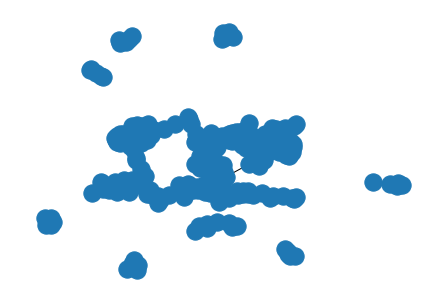

In [65]:
giant_cl = filter_isolate_nodes(giant_cl,min_count=4)
print(giant_cl)
nx.draw_spring(giant_cl)

网络图美化

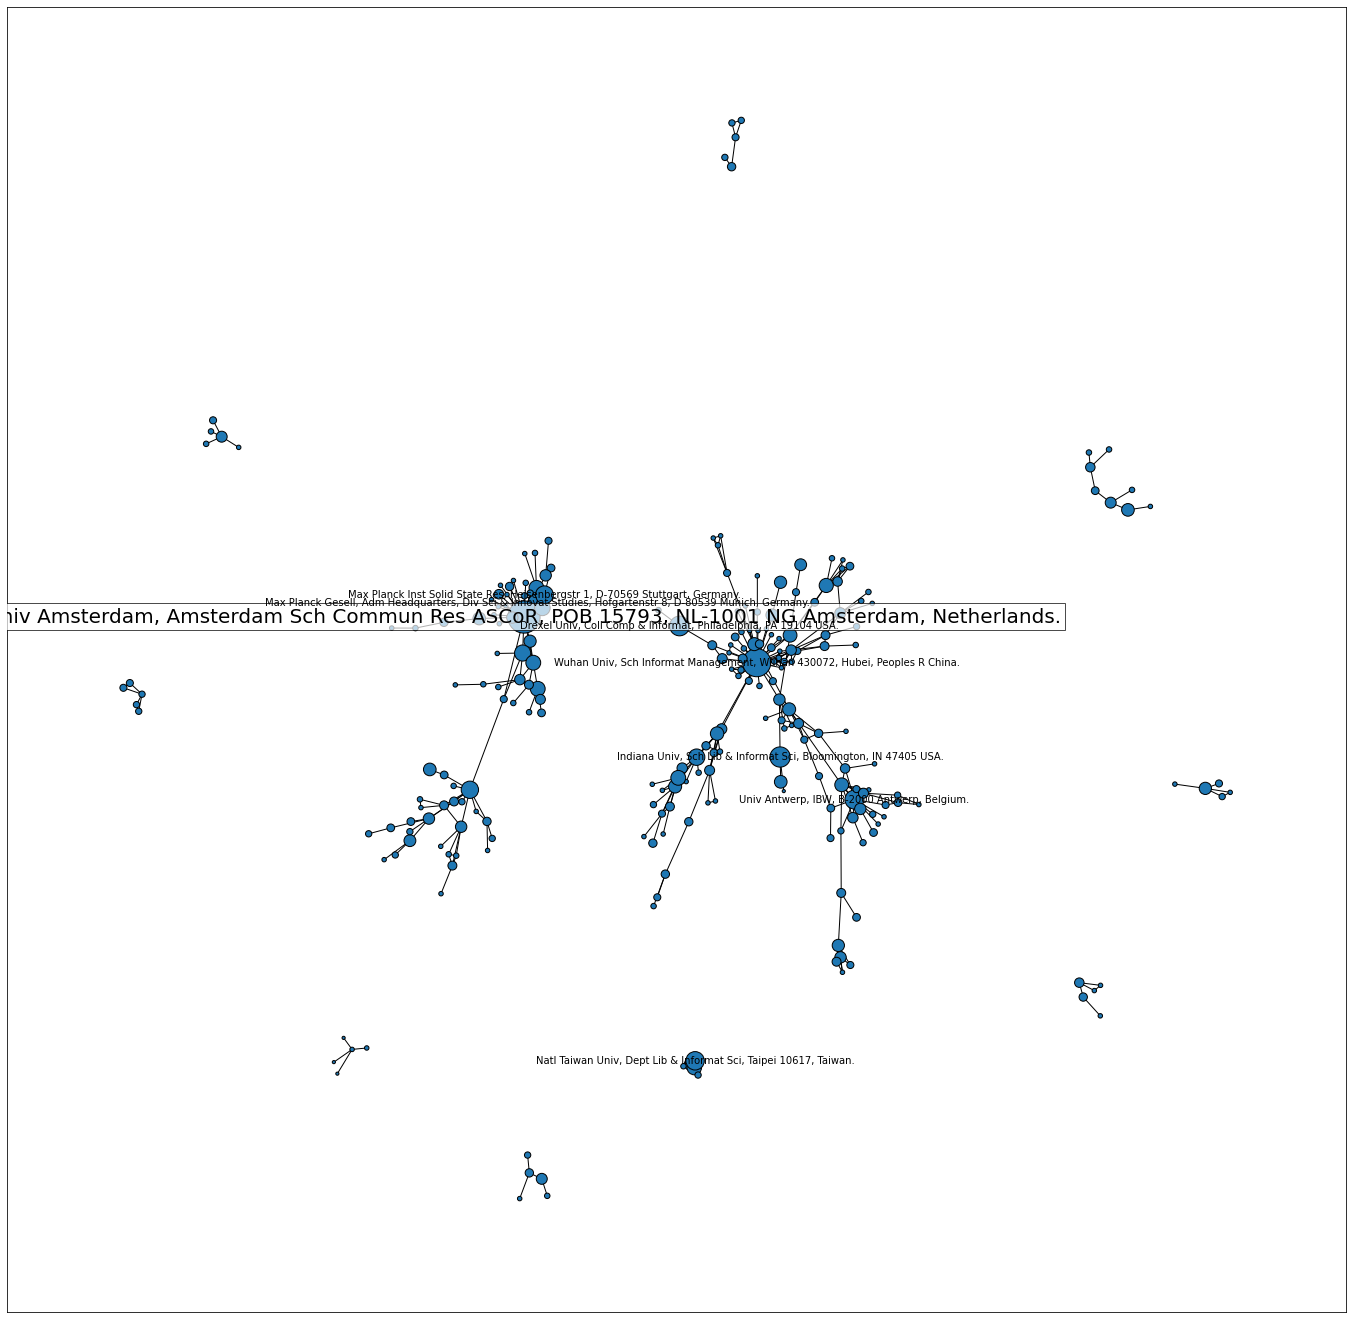

In [66]:
node_size = [v['count']*10 for k,v in giant_cl.nodes.data()]

plt.figure(figsize=(24,24))

pos = nx.spring_layout(giant_cl,seed= 42)

nx.draw_networkx_edges(giant_cl,pos)
nx.draw_networkx_nodes(giant_cl,pos,node_size=node_size,edgecolors='k')

G_sub =giant_cl.subgraph([k for k,v in giant_cl.nodes.data() if v['count']>=100])
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_sub,pos,font_size=20,bbox=label_options,)

G_sub_1 = giant_cl.subgraph([k for k,v in giant_cl.nodes.data() if 50<v['count']<100])
nx.draw_networkx_labels(G_sub_1,pos,font_size=10)

G_sub_2 = giant_cl.subgraph([k for k,v in giant_cl.nodes.data() if 30<v['count']<=50])
nx.draw_networkx_labels(G_sub_2,pos,font_size=10)


plt.savefig('figures/one_mode_uni_detailed.png',dpi=300,bbox='tight')

## 对节点标签进行简化，直接获取研究的大学的关联网络

In [67]:
RC1021 = RC.yearSplit(2010,2021)
cl_network_uni = RC1021.networkOneMode('C1',stemmer=lambda x:x.split(',')[0])
print(mk.graphStats(cl_network_uni))

Nodes: 2996
Edges: 6970
Isolates: 279
Self loops: 484
Density: 0.00155355
Transitivity: 0.155309


In [68]:
giant_cl_uni = max([cl_network_uni.subgraph(c) for c in nx.connected_components(cl_network_uni)], key=len)
print(mk.graphStats(giant_cl_uni))

Nodes: 2354
Edges: 6647
Isolates: 0
Self loops: 410
Density: 0.00240009
Transitivity: 0.153855


In [69]:
giant_cl_uni = nx.Graph(giant_cl_uni)
mk.dropEdges(giant_cl_uni,minWeight=4,dropSelfLoops=True)
print(mk.graphStats(giant_cl_uni))

Nodes: 2354
Edges: 406
Isolates: 1994
Self loops: 0
Density: 0.000146598
Transitivity: 0.114917


Graph with 226 nodes and 314 edges


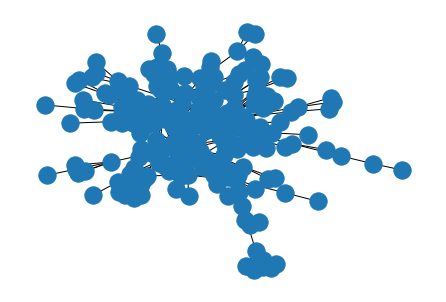

In [70]:
giant_cl_uni = filter_isolate_nodes(giant_cl_uni,min_count=8)
print(giant_cl_uni)
nx.draw_spring(giant_cl_uni)

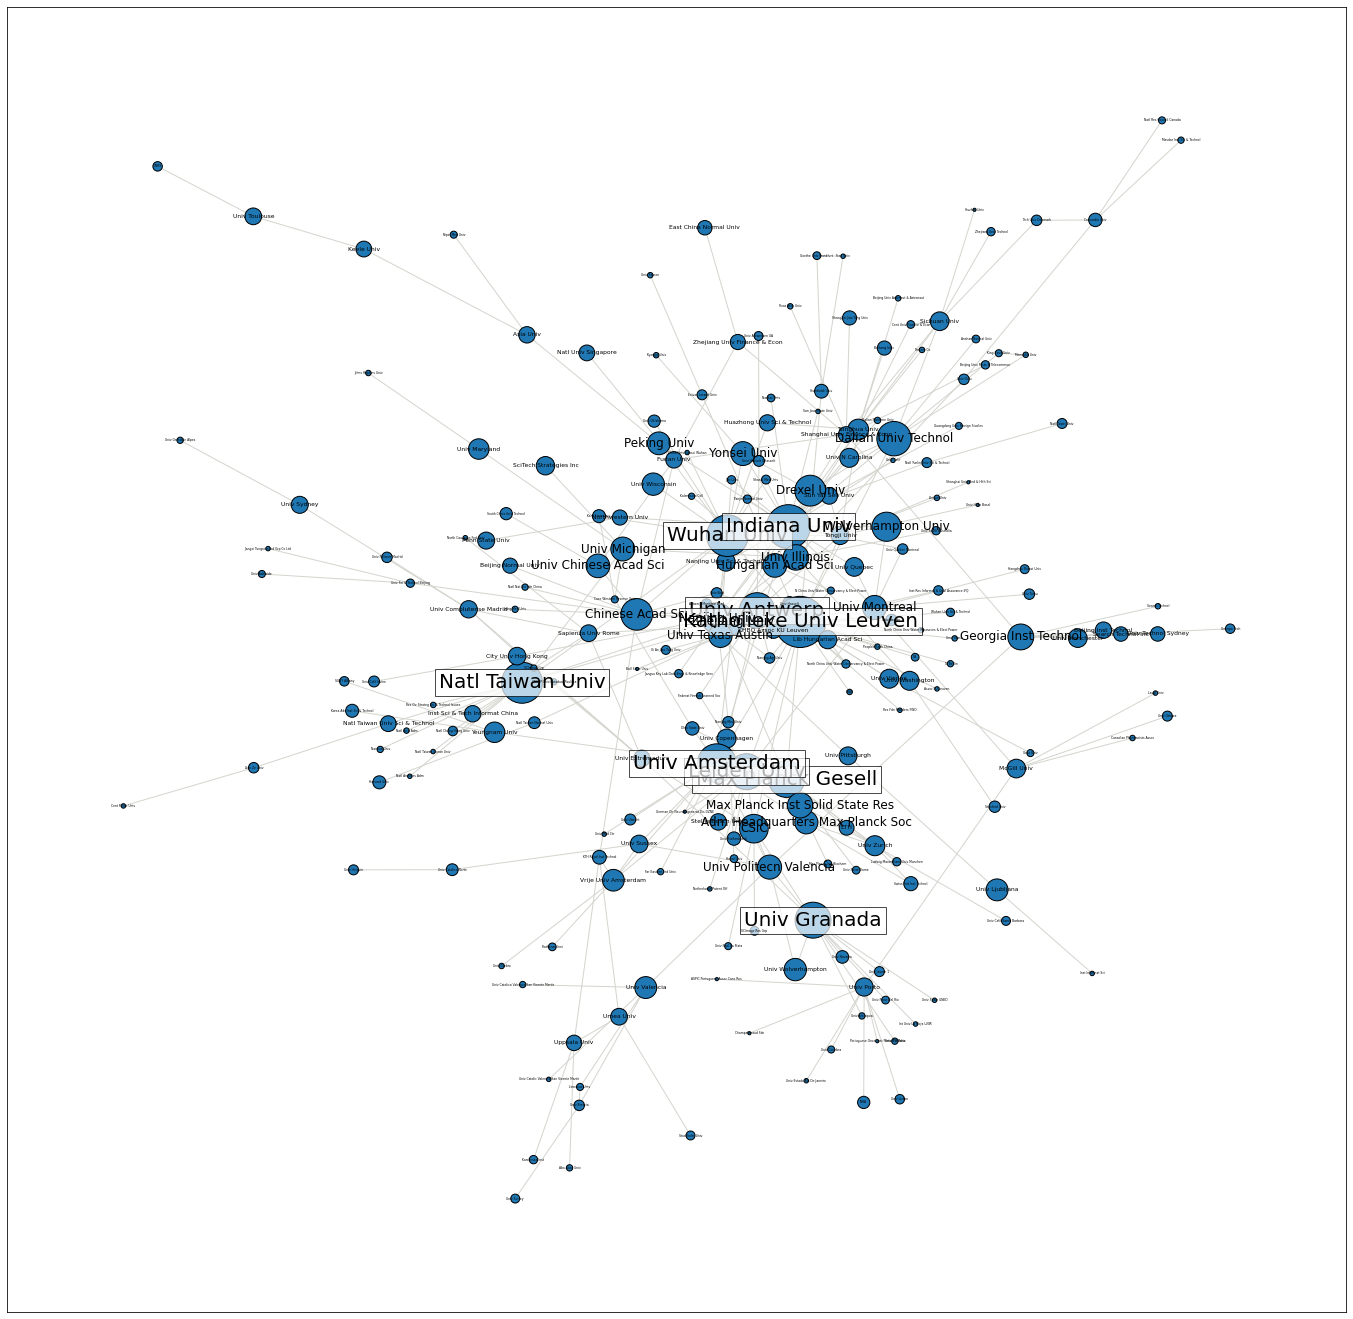

In [71]:
node_size = [v['count']*10 for k,v in giant_cl_uni.nodes.data()]
# edge_width = [v[-1]['weight'] for v in giant_cl.edges.data()]


plt.figure(figsize=(24,24))

pos = nx.spring_layout(giant_cl_uni,seed= 98,k=0.2)

nx.draw_networkx_edges(giant_cl_uni,pos,
#                        width=edge_width,
                       edge_color="#D4D5CE",
                       alpha=1)
nx.draw_networkx_nodes(giant_cl_uni,pos,node_size=node_size,edgecolors='k')

G_sub =giant_cl_uni.subgraph([k for k,v in giant_cl_uni.nodes.data() if v['count']>=120])
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_sub,pos,font_size=20,bbox=label_options,)

G_sub_1 = giant_cl_uni.subgraph([k for k,v in giant_cl_uni.nodes.data() if 50<v['count']<120])
nx.draw_networkx_labels(G_sub_1,pos,font_size=12)

G_sub_2 = giant_cl_uni.subgraph([k for k,v in giant_cl_uni.nodes.data() if 20<v['count']<=50])
nx.draw_networkx_labels(G_sub_2,pos,font_size=6)

G_sub_3 = giant_cl_uni.subgraph([k for k,v in giant_cl_uni.nodes.data() if v['count']<=20])
nx.draw_networkx_labels(G_sub_3,pos,font_size=3)


plt.savefig('figures/one_mode_uni.png',dpi=300,bbox='tight')